<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/mateuszszczepanek/data-analysis-drink-by-country"><img src="https://cdn.iconscout.com/icon/free/png-128/kaggle-3628869-3030009.png" />Open in Kaggle</a>
  </td>
</table>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(filepath_or_buffer="../input/drinksbycountry/drinks.csv")
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


### Displays the alcohol consumption in the specified country.

In [3]:
df[ df.country == "Japan"]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
85,Japan,77,202,16,7.0,Asia


In [4]:
df.rename(columns={"total_litres_of_pure_alcohol":"total"}, inplace=True)
df.head()

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


### Grouped by 'continent' column.

In [5]:
dfg = df.groupby("continent")

In [6]:
dfg.size()

continent
Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
dtype: int64

In [7]:
dfg.count()

,country,beer_servings,spirit_servings,wine_servings,total
continent,,,,,
Africa,53,53,53,53,53
Asia,44,44,44,44,44
Europe,45,45,45,45,45
North America,23,23,23,23,23
Oceania,16,16,16,16,16
South America,12,12,12,12,12


### Average value for each column for each country.

In [8]:
dfg.mean()

,beer_servings,spirit_servings,wine_servings,total
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


In [9]:
dfg["wine_servings"]

In [10]:
dfg["wine_servings"].max().to_frame().T

continent,Africa,Asia,Europe,North America,Oceania,South America
wine_servings,233,123,370,100,212,221


In [11]:
dfg[ ["wine_servings", "total"] ].max()

,wine_servings,total
continent,,
Africa,233,9.1
Asia,123,11.5
Europe,370,14.4
North America,100,11.9
Oceania,212,10.4
South America,221,8.3


### Display the minimum, maximum, average and standard deviation values for each column by using the aggregate function.

In [12]:
dfg.aggregate([min, max, pd.np.mean, pd.np.std])

beer_servings                             spirit_servings       \
                        min  max        mean        std             min  max   
continent                                                                      
Africa                    0  376   61.471698  80.557816               0  152   
Asia                      0  247   37.045455  49.469725               0  326   
Europe                    0  361  193.777778  99.631569               0  373   
North America             1  285  145.434783  79.621163              68  438   
Oceania                   0  306   89.687500  96.641412               0  254   
South America            93  333  175.083333  65.242845              25  302   

                                     wine_servings                   \
                     mean        std           min  max        mean   
continent                                                             
Africa          16.339623  28.102794             0  233   16.264151   
Asia            60.840909  84.362160             0  123    9.068182   
Europe         132.555556  77.589115             0  370  142.222222   
North America  165.739130  94.993884             1  100   24.521739   
Oceania         58.437500  70.504817             0  212   35.625000   
South America  114.750000  77.077440             1  221   62.416667   

                         total                            
                     std   min   max      mean       std  
continent                                                 
Africa         38.846419   0.0   9.1  3.007547  2.647557  
Asia           21.667034   0.0  11.5  2.170455  2.770239  
Europe         97.421738   0.0  14.4  8.617778  3.358455  
North America  28.266378   2.2  11.9  5.995652  2.409353  
Oceania        64.555790   0.0  10.4  3.381250  3.345688  
South America  88.620189   3.8   8.3  6.308333  1.531166

In [13]:
# Keys for groups
dfg.groups.keys()

dict_keys(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

In [14]:
# Shows on which position from original list is Asia.
dfg.groups["Asia"]

Int64Index([  0,  12,  13,  19,  24,  30,  36,  46,  77,  78,  79,  80,  82,
             85,  86,  87,  90,  91,  92,  94, 102, 103, 112, 116, 119, 127,
            128, 134, 137, 138, 141, 149, 154, 161, 167, 168, 169, 171, 176,
            177, 181, 186, 189, 190],
           dtype='int64')

In [15]:
df.loc[dfg.groups["Asia"]]

,country,beer_servings,spirit_servings,wine_servings,total,continent
0,Afghanistan,0,0,0,0.0,Asia
12,Bahrain,42,63,7,2.0,Asia
13,Bangladesh,0,0,0,0.0,Asia
19,Bhutan,23,0,0,0.4,Asia
24,Brunei,31,2,1,0.6,Asia
30,Cambodia,57,65,1,2.2,Asia
36,China,79,192,8,5.0,Asia
46,North Korea,0,0,0,0.0,Asia
77,India,9,114,0,2.2,Asia
78,Indonesia,5,1,0,0.1,Asia


### Displaying the country with the highest value in the total column.

In [16]:
# Method 1st
df.sort_values("total", ascending=False).groupby("continent").first()

,country,beer_servings,spirit_servings,wine_servings,total
continent,,,,,
Africa,Nigeria,42,5,2,9.1
Asia,Russian Federation,247,326,73,11.5
Europe,Belarus,142,373,42,14.4
North America,Grenada,199,438,28,11.9
Oceania,Australia,261,72,212,10.4
South America,Argentina,193,25,221,8.3


In [17]:
# Method 2nd
df.sort_values("total", ascending=False).drop_duplicates(subset="continent").set_index("continent")

,country,beer_servings,spirit_servings,wine_servings,total
continent,,,,,
Europe,Belarus,142,373,42,14.4
North America,Grenada,199,438,28,11.9
Asia,Russian Federation,247,326,73,11.5
Oceania,Australia,261,72,212,10.4
Africa,Nigeria,42,5,2,9.1
South America,Argentina,193,25,221,8.3


In [18]:
df.query(" country=='Poland' ")

,country,beer_servings,spirit_servings,wine_servings,total,continent
135,Poland,343,215,56,10.9,Europe


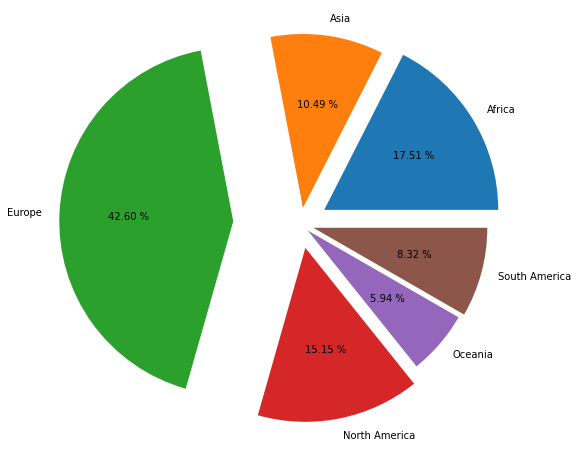

In [19]:
continent = df.groupby("continent").groups.keys()
total = [df.groupby("continent").get_group(cont).total.sum() for cont in df.groupby("continent").groups.keys()]

plt.figure(figsize=(12, 8))
plt.pie(x=total, 
        labels=continent, 
        labeldistance=1.1, 
        autopct="%.2f %%",
        shadow=False,
        explode= [x/1000 for x in total]
)

plt.show()

In [20]:
continent = df.groupby("continent").groups.keys()
total = [df.groupby("continent").get_group(cont).total.sum() for cont in df.groupby("continent").groups.keys()]

px.pie(
    data_frame=df.groupby("continent").sum().reset_index(), 
    values="total", 
    names="continent", 
    title="Total pure alcohol consumption for each continent."
)